In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import nltk
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import timeit

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from nltk.stem.snowball import SnowballStemmer

from nltk.stem import WordNetLemmatizer 
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zyter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zyter\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zyter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zyter\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zyter\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('train.csv')
df

,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image
0,5.0,"08 26, 2014",u92990698,A contemporary jazz and soul performer who's m...,""" CLASSIQUE """,1409011200,Jazz,$8.40,p23649501,3856620,NaN
1,5.0,"05 11, 2003",u36200649,Very good idea to put both the 'pop' and 'orch...,Exceeded my Expectations - This album RAWKS!,1052611200,Alternative Rock,$10.98,p58458313,56086781,NaN
2,5.0,"12 5, 2017",u10721702,This is a great collection of Carole King's so...,A Must-have for Carole King Fans,1512432000,Pop,$5.99,p97027626,55852154,NaN
3,5.0,"09 24, 2013",u86003775,The is album is a brilliant piece of Jazz fusi...,A Master piece!,1379980800,Jazz,$14.64,p43167086,43228100,NaN
4,5.0,"01 14, 2015",u25672859,Waited a LONG time for this DVD to be released...,especially if you like concert videos,1421193600,Alternative Rock,$9.92,p94494236,54425467,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149995,5.0,"09 12, 2013",u29136602,There is just something about Wesley's voice t...,Just right.,1378944000,Alternative Rock,$9.49,p26326919,90575108,NaN
149996,5.0,"05 15, 2016",u51715193,How many recordings of Verdis Requiem do you o...,Being there in vibrant immediacy of performan...,1463270400,Classical,$14.83,p69247882,74425587,NaN
149997,5.0,"06 13, 2004",u28696060,....their best overall album. After the revis...,Creative rebirth and possibly....,1087084800,Alternative Rock,$18.86,p07028930,20399056,NaN
149998,5.0,"06 27, 2012",u04925906,"Believe it or not, once upon a time, artists l...",Once Upon A Time,1340755200,Pop,$19.99,p38606785,5931588,NaN


In [3]:
#set up the function to clean the text in dataset

def clean_data(df):

  #for column df['reviewText']
  ###text cleaning
  #remove 'rt' since it does not contribute to sentiment
  #df['cleaned text'] = df['reviewText'].str.replace('RT ', ' ')
  #convert to lowercase
  df['reviewText'] = df['reviewText'].str.lower()
    #fill empty cells with ' '
  df['reviewText'] = df['reviewText'].fillna(' ')
  #remove stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
  #remove @user and URLs
  df['reviewText'] = df['reviewText'].str.replace(r"(?:\@|https?\://)\S+", " ")
  #remove all other special characters
  df['reviewText'] = df['reviewText'].str.replace('[^A-Za-z\s]+', ' ')
  #fill empty cells with ' '
  df['reviewText'] = df['reviewText'].fillna(' ')
  #remove stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


  #for column df['summary']
  #convert to lowercase
  df['summary'] = df['summary'].str.lower()
  #fill empty cells with ' '
  df['summary'] = df['summary'].fillna(' ')
  #remove stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
  #remove @user and URLs
  df['summary'] = df['summary'].str.replace(r"(?:\@|https?\://)\S+", " ")
  #remove all other special characters
  df['summary'] = df['summary'].str.replace('[^A-Za-z\s]+', ' ')
  #fill empty cells with ' '
  df['summary'] = df['summary'].fillna(' ')
  #remove stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
  
  #for column df['price']
  df['price'] = df['price'].str.replace('$','')
  df['price'] = pd.to_numeric(df['price'], errors='coerce')
  #fill NaN with mean price
  df['price'] = df['price'].fillna(df['price'].mean())


  return(df)

clean_data(df)
df

,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image
0,5.0,"08 26, 2014",u92990698,contemporary jazz soul performer made two deca...,classique,1409011200,Jazz,8.40,p23649501,3856620,NaN
1,5.0,"05 11, 2003",u36200649,good idea put pop orchestral music matrix relo...,exceeded expectations album rawks,1052611200,Alternative Rock,10.98,p58458313,56086781,NaN
2,5.0,"12 5, 2017",u10721702,great collection carole king songs,must carole king fans,1512432000,Pop,5.99,p97027626,55852154,NaN
3,5.0,"09 24, 2013",u86003775,album brilliant piece jazz fusion start finish...,master piece,1379980800,Jazz,14.64,p43167086,43228100,NaN
4,5.0,"01 14, 2015",u25672859,waited long time dvd released watching year ol...,especially like concert videos,1421193600,Alternative Rock,9.92,p94494236,54425467,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149995,5.0,"09 12, 2013",u29136602,something wesley voice makes swoon little bit ...,right,1378944000,Alternative Rock,9.49,p26326919,90575108,NaN
149996,5.0,"05 15, 2016",u51715193,many recordings verdis requiem often asked que...,vibrant immediacy performance spiritual uplifting,1463270400,Classical,14.83,p69247882,74425587,NaN
149997,5.0,"06 13, 2004",u28696060,best overall album revisionist fall following ...,creative rebirth possibly,1087084800,Alternative Rock,18.86,p07028930,20399056,NaN
149998,5.0,"06 27, 2012",u04925906,believe upon time artists like enchantment cou...,upon time,1340755200,Pop,19.99,p38606785,5931588,NaN


In [5]:
def feature_engineering(df):

    #flag the examples with column['summay'] =='five stars', and save in column['five stars in summary']
    df['five stars in summary'] = df['summary'].apply(lambda x: int(x=='five stars'))
    # Use English stemmer.
    stemmer = SnowballStemmer("english")
    # set lemmatizer
    lemmatizer = WordNetLemmatizer()
    #for column df['reviewText']
    #for reviewText
    #lemmatize
    df['reviewText_lemm'] =df['reviewText'].apply(lambda x:' '.join(lemmatizer.lemmatize(x)for x in x.split()))
    #stem
    df['reviewText'] = df['reviewText'].apply(lambda x:' '.join(stemmer.stem(x)for x in x.split()))# Stem every word.

    #for summary
    #lemmatize
    df['summary_lemm'] =df['summary'].apply(lambda x:' '.join(lemmatizer.lemmatize(x)for x in x.split()))
    #stem
    df['summary'] = df['summary'].apply(lambda x:' '.join(stemmer.stem(x)for x in x.split()))# Stem every word.
    return(df)


feature_engineering(df)
df

,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image,five stars in summary,reviewText_lemm,summary_lemm
0,5.0,"08 26, 2014",u92990698,contemporari jazz soul perform made two decad ...,classiqu,1409011200,Jazz,8.40,p23649501,3856620,NaN,0,contemporary jazz soul performer made two deca...,classique
1,5.0,"05 11, 2003",u36200649,good idea put pop orchestr music matrix reload...,exceed expect album rawk,1052611200,Alternative Rock,10.98,p58458313,56086781,NaN,0,good idea put pop orchestral music matrix relo...,exceeded expectation album rawks
2,5.0,"12 5, 2017",u10721702,great collect carol king song,must carol king fan,1512432000,Pop,5.99,p97027626,55852154,NaN,0,great collection carole king song,must carole king fan
3,5.0,"09 24, 2013",u86003775,album brilliant piec jazz fusion start finish ...,master piec,1379980800,Jazz,14.64,p43167086,43228100,NaN,0,album brilliant piece jazz fusion start finish...,master piece
4,5.0,"01 14, 2015",u25672859,wait long time dvd releas watch year old vhs d...,especi like concert video,1421193600,Alternative Rock,9.92,p94494236,54425467,NaN,0,waited long time dvd released watching year ol...,especially like concert video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,5.0,"09 12, 2013",u29136602,someth wesley voic make swoon littl bit voic h...,right,1378944000,Alternative Rock,9.49,p26326919,90575108,NaN,0,something wesley voice make swoon little bit v...,right
149996,5.0,"05 15, 2016",u51715193,mani record verdi requiem often ask question s...,vibrant immediaci perform spiritu uplift,1463270400,Classical,14.83,p69247882,74425587,NaN,0,many recording verdi requiem often asked quest...,vibrant immediacy performance spiritual uplifting
149997,5.0,"06 13, 2004",u28696060,best overal album revisionist fall follow grea...,creativ rebirth possibl,1087084800,Alternative Rock,18.86,p07028930,20399056,NaN,0,best overall album revisionist fall following ...,creative rebirth possibly
149998,5.0,"06 27, 2012",u04925906,believ upon time artist like enchant could see...,upon time,1340755200,Pop,19.99,p38606785,5931588,NaN,0,believe upon time artist like enchantment coul...,upon time


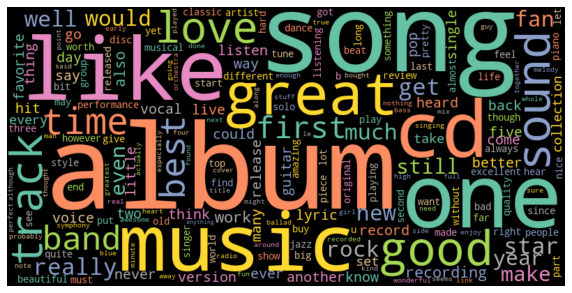

In [6]:
#generate word cloud
import re
!pip install wordcloud
from wordcloud import WordCloud
def spacing_token(text):
  text = re.sub(r'[^A-Za-z0-9 ]+', '', str(text))
  text = re.findall(r'\S+', text)
  return text

df['reviewText_lemm_token'] = df['reviewText_lemm'].apply(spacing_token) #tokenize
df['summary_lemm_token'] = df['summary_lemm'].apply(spacing_token) #tokenize
df['word_cloud'] =df['reviewText_lemm_token'] + df['summary_lemm_token']

b = pd.Series(np.concatenate(df.word_cloud))
df_keyword = b.value_counts().sort_index().rename_axis('keyword').reset_index(name='counts')
df_keyword.sort_values(by=['counts'], ascending = False)

data_lemm = dict(zip(df_keyword['keyword'].tolist(), df_keyword['counts'].tolist()))
wc = WordCloud(width=800, height=400, max_words=200, colormap = 'Set2', random_state = 23).generate_from_frequencies(data_lemm)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

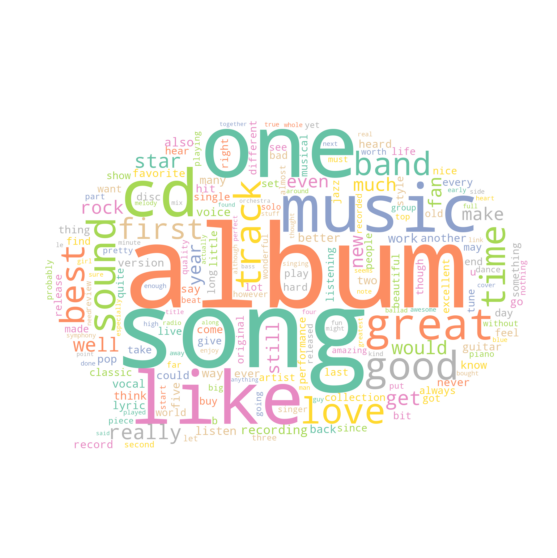

In [7]:
#from PIL import Image ###a nicer version of wordcloud
#mask = np.array(Image.open('comment.png'))
#wc = WordCloud(width=1000, height=600, max_words=200, colormap = 'Set2', background_color = 'white', mask = mask, random_state = 23).generate_from_frequencies(data_lemm)
#plt.figure(figsize=(10, 10))
#plt.imshow(wc, interpolation='bilinear')
#plt.axis('off')
#plt.show()

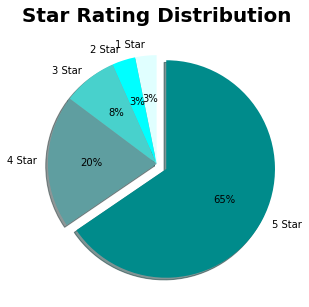

Text(0.5, 0, 'Stars')

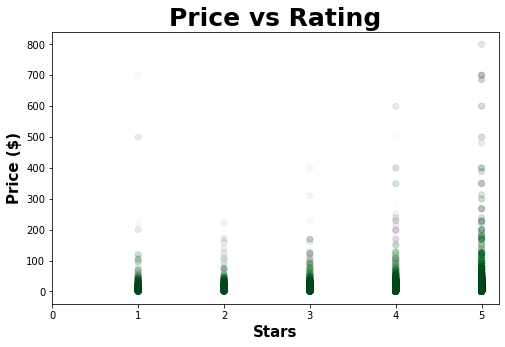

In [8]:
from collections import Counter
piepie = Counter(df.overall)
piepie

plt.figure(figsize=(8, 5))
plt.pie((piepie[1],piepie[2],piepie[3],piepie[4],piepie[5]), labels = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star'], \
        explode = [0,0,0,0,0.1], colors = ['LightCyan','Aqua','MediumTurquoise','CadetBlue','DarkCyan'], startangle = 90, \
        shadow = True, autopct='%1.0f%%', textprops={'fontsize': 10})
plt.title("Star Rating Distribution", fontweight = 'bold', fontsize=20)
plt.show() 

print("")
print("")
print("")
# Price seems to have a relationship with the rating 
import matplotlib.cm as cm
plt.figure(figsize=(8, 5))
plt.scatter(df["overall"], df["price"], c=np.arange(150000), cmap="PRGn", alpha = 0.1)
plt.title("Price vs Rating",fontsize = 25, fontweight = 'bold')
plt.xticks(range(6), [0,1,2,3,4,5])
plt.ylabel("Price ($)",fontsize = 15, fontweight = 'bold')
plt.xlabel("Stars",fontsize = 15, fontweight = 'bold')

In [9]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test= train_test_split(df.drop(columns='overall'),df['overall'],test_size=0.1, stratify=df['overall'], random_state=40)
df_train

,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image,five stars in summary,reviewText_lemm,summary_lemm,reviewText_lemm_token,summary_lemm_token,word_cloud
42377,"11 21, 2005",u55375218,love singl flawless like stupid song make danc...,madonna best,1132531200,Pop,13.712558,p20136623,92807973,NaN,0,love single flawless like stupid song make dan...,madonna best,"[love, single, flawless, like, stupid, song, m...","[madonna, best]","[love, single, flawless, like, stupid, song, m..."
88980,"12 21, 2016",u13651537,amaz album,cd,1482278400,Alternative Rock,1.730000,p08437987,26010484,NaN,0,amazing album,cd,"[amazing, album]",[cd],"[amazing, album, cd]"
143076,"04 24, 2013",u67662099,attacca quartet fierc competit john book alleg...,great record one titl piec,1366761600,Classical,16.990000,p17844235,48227366,NaN,0,attacca quartet fierce competition john book a...,great recording one title piece,"[attacca, quartet, fierce, competition, john, ...","[great, recording, one, title, piece]","[attacca, quartet, fierce, competition, john, ..."
46866,"06 3, 2016",u29447189,aficionado rock heyday consid honest say nirva...,nirvana rock,1464912000,Alternative Rock,4.720000,p52447249,33457496,NaN,0,aficionado rock heyday consider honestly say n...,nirvana rock,"[aficionado, rock, heyday, consider, honestly,...","[nirvana, rock]","[aficionado, rock, heyday, consider, honestly,..."
124033,"07 22, 2014",u29349131,fantast john prime collect,five star,1405987200,Pop,14.730000,p01973611,87139390,NaN,1,fantastic john prime collection,five star,"[fantastic, john, prime, collection]","[five, star]","[fantastic, john, prime, collection, five, star]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139638,"02 28, 2001",u75550984,mari hopkin type welsh girl grandmoth would wa...,mari hopkin god love,983318400,Pop,9.410000,p38946421,52825744,NaN,0,mary hopkin type welsh girl grandmother would ...,mary hopkin god love,"[mary, hopkin, type, welsh, girl, grandmother,...","[mary, hopkin, god, love]","[mary, hopkin, type, welsh, girl, grandmother,..."
68639,"06 10, 2012",u91675121,nice hear differ version song danc sing alway ...,ok remix song,1339286400,Alternative Rock,2.040000,p75043889,11094163,NaN,0,nice hear different version song dance sing al...,ok remixes song,"[nice, hear, different, version, song, dance, ...","[ok, remixes, song]","[nice, hear, different, version, song, dance, ..."
66140,"12 27, 2015",u69760720,great concert like josh groban mani good song,great groban music,1451174400,Pop,7.360000,p24469024,52364371,NaN,0,great concert like josh groban many good song,great groban music,"[great, concert, like, josh, groban, many, goo...","[great, groban, music]","[great, concert, like, josh, groban, many, goo..."
40214,"06 3, 2014",u12223754,mayb two song album great howev still good won...,wonder britney album,1401753600,Pop,42.430000,p47625800,29336001,NaN,0,maybe two song album great however still good ...,wonderful britney album,"[maybe, two, song, album, great, however, stil...","[wonderful, britney, album]","[maybe, two, song, album, great, however, stil..."


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
df_train['unixReviewTime'] = scaler.fit_transform(df_train['unixReviewTime'].values.reshape(-1,1))
df_test['unixReviewTime'] = scaler.transform(df_test['unixReviewTime'].values.reshape(-1,1))
#df_train['price'] = scaler.fit_transform(df_train['price'].values.reshape(-1,1))
#df_test['price'] = scaler.transform(df_test['price'].values.reshape(-1,1))

In [15]:
#get TF-IDF of coloumn['reviewText']
vectorizer_reviewText = TfidfVectorizer(max_features=5000)
vectorizer_reviewText.fit(df_train['reviewText'])
X_train_reviewText_TFIDF = vectorizer_reviewText.transform(df_train['reviewText'])
X_test_reviewText_TFIDF = vectorizer_reviewText.transform(df_test['reviewText'])

#get TF-IDF of column['summary']
vectorizer_summary = TfidfVectorizer(max_features=2420)
vectorizer_summary.fit(df_train['summary'])
X_train_summary_TFIDF = vectorizer_summary.transform(df_train['summary'])
X_test_summary_TFIDF = vectorizer_summary.transform(df_test['summary'])

from scipy.sparse import csr_matrix
X_train_unixReviewTimeandprice = csr_matrix(df_train.drop(columns=['summary','reviewText','image','five stars in summary','reviewText_lemm','summary_lemm','reviewText_lemm_token','summary_lemm_token','word_cloud','reviewTime', 'reviewerID', 'itemID', 'reviewHash','category']))
X_test_unixReviewTimeandprice = csr_matrix(df_test.drop(columns=['summary','reviewText','image','five stars in summary','reviewText_lemm','summary_lemm','reviewText_lemm_token','summary_lemm_token','word_cloud','reviewTime', 'reviewerID', 'itemID', 'reviewHash','category']))

from scipy.sparse import hstack
X_train = hstack([X_train_reviewText_TFIDF, X_train_summary_TFIDF,X_train_unixReviewTimeandprice])
X_test = hstack([X_test_reviewText_TFIDF, X_test_summary_TFIDF,X_test_unixReviewTimeandprice])


In [16]:
#linear regressor
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,normalize=True,copy_X=False)
start = timeit.default_timer()
model.fit(X_train,y_train)
print('linear regression model:')
#print('training score: ',model.score(X_train,y_train))
#print('validation score: ' ,model.score(X_test,y_test))
stop = timeit.default_timer()

#set boundary for the predictions. Since the linear regression could predict outside the range of 1-5
#replace any prediction under 1 by 1 and any prediction above 5 by 5, so the labels predicted are within the range of 1-5
trainpredict = model.predict(X_train) 
trainpredict[trainpredict<1],trainpredict[trainpredict>5] = 1,5
validationpredict = model.predict(X_test)
validationpredict[validationpredict<1],validationpredict[validationpredict>5] = 1,5


print('train MSE: ',(np.square(trainpredict - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(validationpredict - y_test)).mean(axis = 0))
print('Time spent: ', stop - start)  

linear regression model:
train MSE:  0.45716862715970447
validation MSE:  0.5168810414300871
Time spent:  3.562665100000004


In [ ]:
#load the actual test data file and use it to predict

df_testfile = pd.read_csv('test.csv')

clean_data(df_testfile)
feature_engineering(df_testfile)

df_testfile['unixReviewTime'] = scaler.transform(df_testfile['unixReviewTime'].values.reshape(-1,1))

X_testfile_reviewText_TFIDF = vectorizer_reviewText.transform(df_testfile['reviewText'])
X_testfile_summary_TFIDF = vectorizer_summary.transform(df_testfile['summary'])
X_testfile_unixReviewTimeandprice = csr_matrix(df_testfile.drop(columns=['summary','reviewText','image','five stars in summary','reviewText_lemm','summary_lemm','reviewTime', 'reviewerID', 'itemID', 'reviewHash','category']))
X_testfile = hstack([X_testfile_reviewText_TFIDF, X_testfile_summary_TFIDF,X_testfile_unixReviewTimeandprice])

#set boundary for the predictions. Since the linear regression could predict outside the range of 1-5
#replace any prediction under 1 by 1 and any prediction above 5 by 5, so the labels predicted are within the range of 1-5
testpredict = model.predict(X_testfile)
testpredict[testpredict<1],testpredict[testpredict>5] = 1,5

df_testfile['prediction'] = testpredict

df_rating_pairs = pd.read_csv('rating_pairs.csv')
df_rating_pairs['prediction'] = df_testfile['prediction']
df_rating_pairs.to_csv('rating_pairs_output.csv', index=False)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Codes from here on were only used to test out different strategies and models. They were not adopted for the final model.
-------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#This cell was used to find the optimal max_feature parameters

for i in [3000,4000,5000,6000,7000,8000,9000,10000]:   #The for loops were used to search the optimal max_feature parameter
    
    #get TF-IDF of coloumn['reviewText']
    vectorizer_reviewText = TfidfVectorizer(max_features=5000)
    vectorizer_reviewText.fit(df_train['reviewText'])
    X_train_reviewText_TFIDF = vectorizer_reviewText.transform(df_train['reviewText'])
    X_test_reviewText_TFIDF = vectorizer_reviewText.transform(df_test['reviewText'])
for i in [2000,2200,2400,2600,2800,3000]:     ##The for loops were used to search the optimal max_feature parameter
    #get TF-IDF of column['summary']
    vectorizer_summary = TfidfVectorizer(max_features=2420)
    vectorizer_summary.fit(df_train['summary'])
    X_train_summary_TFIDF = vectorizer_summary.transform(df_train['summary'])
    X_test_summary_TFIDF = vectorizer_summary.transform(df_test['summary'])


    from scipy.sparse import csr_matrix
    X_train_unixReviewTimeandprice = csr_matrix(df_train.drop(columns=['summary','reviewText','image','five stars in summary','reviewText_lemm','summary_lemm','reviewText_lemm_token','summary_lemm_token','word_cloud','reviewTime', 'reviewerID', 'itemID', 'reviewHash','category']))
    X_test_unixReviewTimeandprice = csr_matrix(df_test.drop(columns=['summary','reviewText','image','five stars in summary','reviewText_lemm','summary_lemm','reviewText_lemm_token','summary_lemm_token','word_cloud','reviewTime', 'reviewerID', 'itemID', 'reviewHash','category']))

    from scipy.sparse import hstack
    X_train = hstack([X_train_reviewText_TFIDF, X_train_summary_TFIDF,X_train_unixReviewTimeandprice])
    X_test = hstack([X_test_reviewText_TFIDF, X_test_summary_TFIDF,X_test_unixReviewTimeandprice])
    
    
    #linear regressor
    from sklearn.linear_model import LinearRegression
    model = LinearRegression(fit_intercept=True,normalize=True,copy_X=False)
    model.fit(X_train,y_train)
    print('linear regression model:')
    print('training score: ',model.score(X_train,y_train))
    print('validation score: ' ,model.score(X_test,y_test))

In [ ]:
#This cell was used to generate BOW vectorizer to test the difference between BOW and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer

#get TF-IDF of coloumn['reviewText']
vectorizer_reviewText = CountVectorizer(max_features=5000)
vectorizer_reviewText.fit(df_train['reviewText'])
X_train_reviewText_BOW = vectorizer_reviewText.transform(df_train['reviewText'])
X_test_reviewText_BOW = vectorizer_reviewText.transform(df_test['reviewText'])


#get TF-IDF of column['summary']
vectorizer_summary = CountVectorizer(max_features=2420)
vectorizer_summary.fit(df_train['summary'])
X_train_summary_BOW = vectorizer_summary.transform(df_train['summary'])
X_test_summary_BOW = vectorizer_summary.transform(df_test['summary'])


from scipy.sparse import csr_matrix
X_train_unixReviewTimeandprice = csr_matrix(df_train.drop(columns=['summary','reviewText','image','five stars in summary','reviewText_lemm','summary_lemm','reviewText_lemm_token','summary_lemm_token','word_cloud','reviewTime', 'reviewerID', 'itemID', 'reviewHash','category']))
X_test_unixReviewTimeandprice = csr_matrix(df_test.drop(columns=['summary','reviewText','image','five stars in summary','reviewText_lemm','summary_lemm','reviewText_lemm_token','summary_lemm_token','word_cloud','reviewTime', 'reviewerID', 'itemID', 'reviewHash','category']))

from scipy.sparse import hstack
X_train = hstack([X_train_reviewText_TFIDF, X_train_summary_TFIDF,X_train_unixReviewTimeandprice])
X_test = hstack([X_test_reviewText_TFIDF, X_test_summary_TFIDF,X_test_unixReviewTimeandprice])

In [ ]:
#This gridsearch was used to optimize the linearRegression parameters

#from sklearn.metrics import make_scorer
#from sklearn.metrics import mean_squared_error
#define your own mse and set greater_is_better=False
#mse = make_scorer(mean_squared_error,greater_is_better=False)

#gridseartch for logestic regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
start = timeit.default_timer()
model_LR = LinearRegression(n_jobs=8)
parameters_LR = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]         
              }
gs_LR = GridSearchCV(model_LR, parameters_LR, cv=5,scoring='neg_mean_squared_error')
gs_LR.fit(X_train,y_train)
stop = timeit.default_timer()
print('Time spent: ', stop - start) 
gs_LR.best_estimator_, gs_LR.best_score_, gs_LR.best_params_ 

In [18]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, n_jobs=8)
start = timeit.default_timer()
model.fit(X_train,y_train)
print('logistic regression model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
stop = timeit.default_timer()
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
print('Time spent: ', stop - start)  

logistic regression model:
training score:  0.762874074074074
testing score:  0.7372666666666666
training MSE:  0.6184592592592593
validation MSE:  0.666
Time spent:  104.53113669999993


In [19]:
#SVM
from sklearn.svm import LinearSVC
model = LinearSVC()
start = timeit.default_timer()
model.fit(X_train,y_train)
print('SVM model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
stop = timeit.default_timer()
print('Time spent: ', stop - start) 

SVM model:
training score:  0.7812222222222223
testing score:  0.7322
training MSE:  0.5286222222222222
validation MSE:  0.6907333333333333
Time spent:  175.87828320000017


In [24]:
#DT
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
start = timeit.default_timer()
model.fit(X_train,y_train)
print('DT model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
stop = timeit.default_timer()
print('Time spent: ', stop - start) 

DT model:
training score:  1.0
testing score:  -0.18157364411640464
training MSE:  0.0
validation MSE:  1.1742666666666666
Time spent:  395.69115839999995


In [25]:
#XGBOOST
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
start = timeit.default_timer()
model.fit(X_train,y_train)
print('XGB model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
stop = timeit.default_timer()
print('Time spent: ', stop - start) 

DT model:
training score:  0.7254814814814815
testing score:  0.7138
training MSE:  0.9495555555555556
validation MSE:  0.9994666666666666
Time spent:  914.2706753999996


In [30]:
#RForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
start = timeit.default_timer()
model.fit(X_train,y_train)
print('random forest model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
stop = timeit.default_timer()
print('Time spent: ', stop - start) 

random forest model:
training score:  0.9998888888888889
testing score:  0.6962666666666667
training MSE:  0.00043703703703703705
validation MSE:  1.1442
Time spent:  386.2561004999998


In [31]:
# straight forward method
classifier_tested = ['logistic regression', 'LinearSVC', 'linear regression','decision tree','XGBoost','random forest']
sf_training_mse = [0.6184,0.5286, 0.4571,0,0.949,0.0004]
sf_validation_mse = [0.666,0.690,0.516,1.174,0.999,1.144]

straight_forward_result = {'model': classifier_tested, 'training_mse': sf_training_mse, 'validation_mse': sf_validation_mse }

straight_forward_table = pd.DataFrame(straight_forward_result)
straight_forward_table

,model,training_mse,validation_mse
0,logistic regression,0.6184,0.666
1,LinearSVC,0.5286,0.690
2,linear regression,0.4571,0.516
3,decision tree,0.0000,1.174
4,XGBoost,0.9490,0.999
5,random forest,0.0004,1.144


# --------------------------------------------------------------------------------------------------------------- Feature Engineering strategy

In [1]:
!pip install contractions
!pip install swifter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

import re
import contractions #!pip install contractions
from html import unescape
from bs4 import BeautifulSoup

import swifter #!pip install swifter 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zyter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_df = pd.read_csv('train.csv', encoding='utf-8') #Training Dataset
test_df = pd.read_csv('test.csv', encoding='utf-8') #Testing Dataset

test_df_start_idx = len(train_df) 
reviews_df = pd.concat([train_df, test_df], ignore_index=True, sort=False) #Combined Datasets for single processing

#Preprocessing

###Combine "reviewTest" + "summary" into Single Feature

In [6]:
reviews_df["reviewText"] = reviews_df["reviewText"].fillna("") + " " + reviews_df["summary"].fillna("")

###Convert "unixReviewTime" to datetime type

In [7]:
reviews_df["reviewTime"] = pd.to_datetime(reviews_df["unixReviewTime"], unit='s')

###Drop Unneeded Features

In [8]:
reviews_df = reviews_df.drop(["image", "reviewHash", "summary"], axis=1)

###Create stemmer and stop words

In [10]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

###Create Various Functions for Text Cleaning

In [11]:
def stem_words(words):
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
  
def remove_stop_words(text):
    text = [word for word in text if word not in stop_words]
    return text

def strip_html(text):
    soup = BeautifulSoup(text)
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', ' ', text)

def parse_html(text):
    text = unescape(strip_html(text)) # HTML code to ASCII, lowercase, and removeing html tags/attributes
    comp = re.compile(r'<\>.]/+^-')
    text = re.sub(comp, '', text)  # removing HTML attributes
    text = remove_between_square_brackets(text)
    return text

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', ' ', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


def clean_text(text):
  text = parse_html(text)
  text = text.lower()
  text = text.replace("\n", " ")
  text = text.replace(u'\xa0', u' ')
  text = text.replace(r"(?:\@|https?\://)\S+", " ") # urls
  text = contractions.fix(text) # contractions
  text = text.replace('[^A-Za-z\s]+', ' ') # special chars
  text = text.split(" ")
  text = remove_punctuation(text)
  text = stem_words(text)
  return " ".join(text)

def clean_text_2(text):
  text = parse_html(text)
  text = text.lower()
  text = text.replace("\n", " ")
  text = text.replace(u'\xa0', u' ')
  text = text.replace(r"(?:\@|https?\://)\S+", " ") # urls
  text = contractions.fix(text) # contractions
  text = text.replace('[^A-Za-z\s]+', ' ') # special chars
  text = text.split(" ")
  text = remove_punctuation(text)
  text = remove_stop_words(text)
  text = lemmatizer(text)
  return " ".join(text)
  
def dollar_to_numeric(text):
  text = text.replace('$','')
  try:
    text = float(text)
  except ValueError:
    text = np.nan
  return text

###Clean "price" Feature

In [12]:
reviews_df["price"] = reviews_df["price"].apply(dollar_to_numeric)
reviews_df["price"] = reviews_df["price"].fillna(reviews_df["price"].median())

###Clean text Feature (created from "reviewText" + "summary")

In [13]:
reviews_df["reviewTextClean"] = reviews_df["reviewText"].swifter.allow_dask_on_strings(enable=True).apply(clean_text)
reviews_df["reviewTextClean2"] = reviews_df["reviewText"].swifter.allow_dask_on_strings(enable=True).apply(clean_text_2)

###Convert Target Variable to Integer

In [14]:
reviews_df['overall'].isnull().values.any()
reviews_df['overall'] = reviews_df['overall'].fillna(5)

In [15]:
def integer(result): 
    return int(result)

reviews_df['overall'] = reviews_df['overall'].apply(integer)

#Data Exploration & Feature Importance

###Create Word Clouds Per Target

(-0.5, 399.5, 199.5, -0.5)

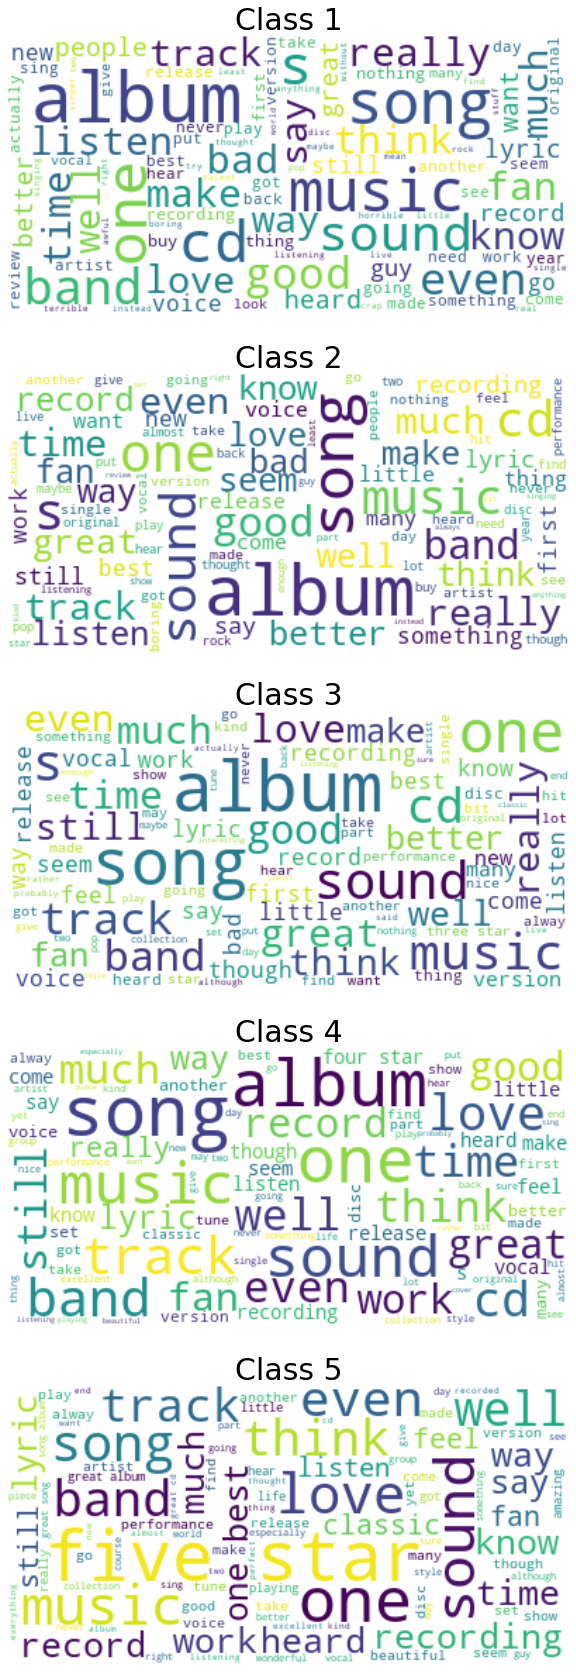

In [16]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_1 = reviews_df[reviews_df['overall']==1]
df_2 = reviews_df[reviews_df['overall']==2]
df_3 = reviews_df[reviews_df['overall']==3]
df_4 = reviews_df[reviews_df['overall']==4]
df_5 = reviews_df[reviews_df['overall']==5]
tweet_1 = " ".join(review for review in df_1.reviewTextClean2)
tweet_2 = " ".join(review for review in df_2.reviewTextClean2)
tweet_3 = " ".join(review for review in df_3.reviewTextClean2)
tweet_4 = " ".join(review for review in df_4.reviewTextClean2)
tweet_5 = " ".join(review for review in df_5.reviewTextClean2)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_1)
wordcloud_2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_2)
wordcloud_3 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_3)
wordcloud_4 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_4)
wordcloud_5 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_5)

# Display the generated image:
ax[0].imshow(wordcloud_1, interpolation='bilinear')
ax[0].set_title('Class 1', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_2, interpolation='bilinear')
ax[1].set_title('Class 2',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_3, interpolation='bilinear')
ax[2].set_title('Class 3',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_4, interpolation='bilinear')
ax[3].set_title('Class 4',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_5, interpolation='bilinear')
ax[4].set_title('Class 5',fontsize=30)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

###View Target Class Distribution

In [17]:
from collections import Counter
counter=Counter(" ".join(reviews_df['reviewTextClean2']).split()).most_common()
counter[0:10]

[('album', 206881),
 ('s', 170921),
 ('song', 164802),
 ('one', 119393),
 ('like', 113371),
 ('music', 105900),
 ('cd', 99181),
 ('great', 97810),
 ('good', 79749),
 ('sound', 74958)]

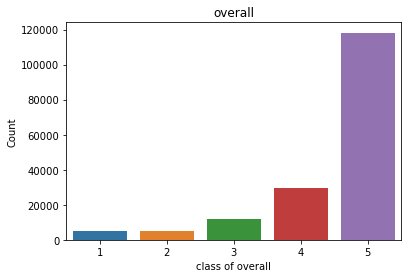

In [18]:
import seaborn as sns 
sns.countplot(x="overall", data=reviews_df)
plt.title("overall")
plt.xlabel("class of overall")
plt.ylabel("Count")
plt.show()

###View Word Frequencies as Bar Plots

In [27]:
def get_top_n_words(corpus, n=None, ngram=1):
    vec = CountVectorizer(stop_words='english', ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    freq_df = pd.DataFrame(words_freq[:n], columns=["Word", "Count"])
    freq_df.set_index("Word", inplace=True)
    return freq_df["Count"]

  
def plot_word_freq(data, corpus_col):
    fig, axes = plt.subplots(2,5, figsize=(15,12))
    j = 0
    for rating in range(1,6):
        corpus = data[data["overall"]==rating][corpus_col]
        get_top_n_words(corpus, 40, 1).plot(kind="barh", ax=axes[0][j])
        get_top_n_words(corpus, 40, 2).plot(kind="barh", ax=axes[1][j])
        axes[0][j].set_title(f"Rating: {int(rating)} stars")
        axes[0][j].set_xlabel("")
        axes[0][j].set_ylabel("")
        axes[1][j].set_ylabel("")
        j+=1
    axes[0][0].set_ylabel("Frequency of word")
    axes[1][0].set_ylabel("Frequency of bigram")
    plt.tight_layout()

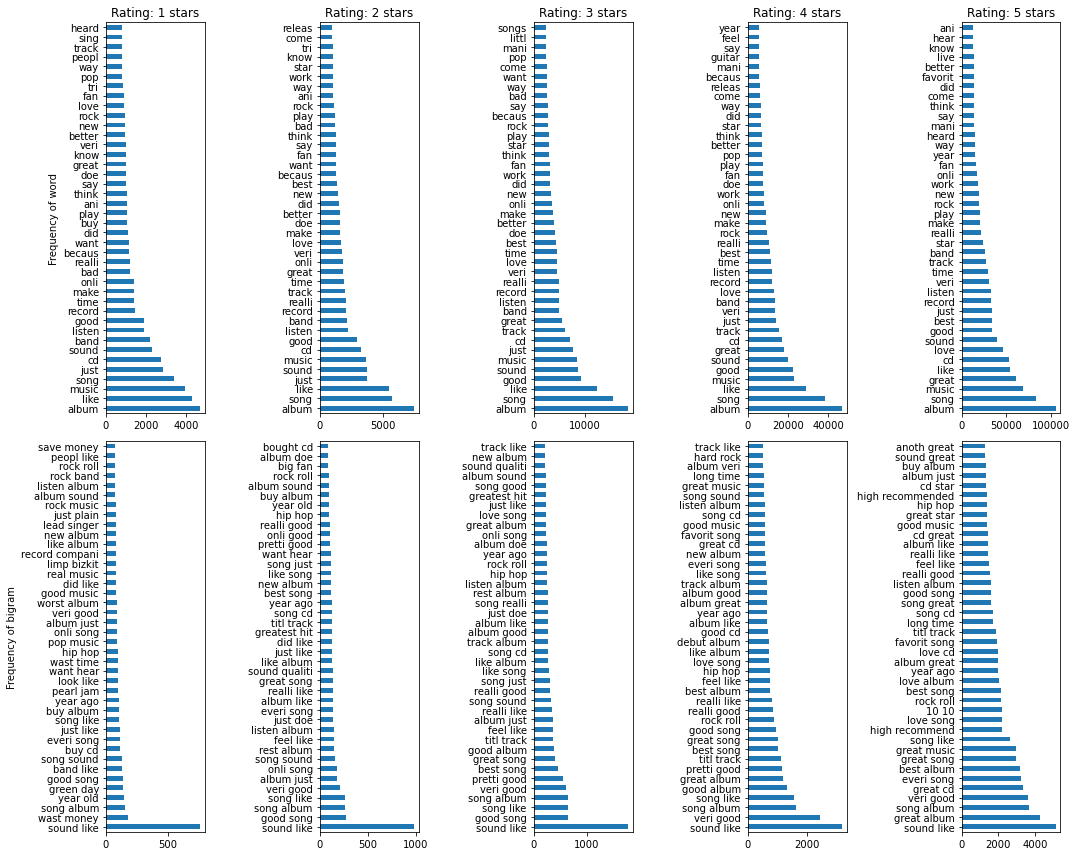

In [20]:
plot_word_freq(reviews_df.iloc[:test_df_start_idx], "reviewTextClean")

###Determine Important of Review DateTime

In [21]:
reviews_df_tr = reviews_df.loc[:test_df_start_idx-1]

####Year

In [23]:
# Year is an important feature -> encode year of posting
reviews_df_tr.groupby(reviews_df_tr['reviewTime'].dt.year).describe()["overall"]

,count,mean,std,min,25%,50%,75%,max
reviewTime,,,,,,,,
1998,287.0,4.379791,0.967302,1.0,4.0,5.0,5.0,5.0
1999,1205.0,4.329461,1.069901,1.0,4.0,5.0,5.0,5.0
2000,5682.0,4.324182,1.029306,1.0,4.0,5.0,5.0,5.0
2001,5216.0,4.278374,1.052395,1.0,4.0,5.0,5.0,5.0
2002,5356.0,4.250187,1.068062,1.0,4.0,5.0,5.0,5.0
2003,5877.0,4.233112,1.117702,1.0,4.0,5.0,5.0,5.0
2004,7067.0,4.167115,1.181255,1.0,4.0,5.0,5.0,5.0
2005,8313.0,4.141465,1.191668,1.0,4.0,5.0,5.0,5.0
2006,6471.0,4.168907,1.160556,1.0,4.0,5.0,5.0,5.0


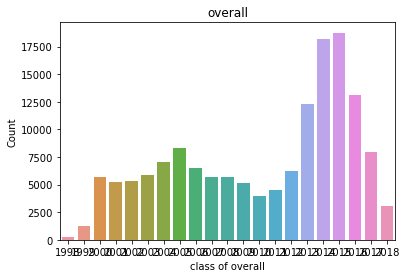

In [24]:
import seaborn as sns 
sns.countplot(x=reviews_df_tr['reviewTime'].dt.year, data=reviews_df)
plt.title("overall")
plt.xlabel("class of overall")
plt.ylabel("Count")
plt.show()

####Month

In [25]:
# Month is not an important feature
reviews_df_tr.groupby(reviews_df_tr['reviewTime'].dt.month).describe()["overall"]

,count,mean,std,min,25%,50%,75%,max
reviewTime,,,,,,,,
1,13375.0,4.437981,0.969950,1.0,4.0,5.0,5.0,5.0
2,12084.0,4.423535,0.985383,1.0,4.0,5.0,5.0,5.0
3,13611.0,4.422820,0.984885,1.0,4.0,5.0,5.0,5.0
4,12445.0,4.403857,1.001935,1.0,4.0,5.0,5.0,5.0
5,12824.0,4.398706,0.995914,1.0,4.0,5.0,5.0,5.0
6,12100.0,4.390744,0.998659,1.0,4.0,5.0,5.0,5.0
7,12368.0,4.419955,0.983438,1.0,4.0,5.0,5.0,5.0
8,12211.0,4.410450,0.997081,1.0,4.0,5.0,5.0,5.0
9,11540.0,4.400953,1.000381,1.0,4.0,5.0,5.0,5.0


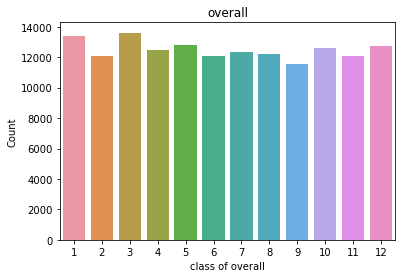

In [26]:
import seaborn as sns 
sns.countplot(x=reviews_df_tr['reviewTime'].dt.month, data=reviews_df)
plt.title("overall")
plt.xlabel("class of overall")
plt.ylabel("Count")
plt.show()

####Day

In [28]:
# day is not important
reviews_df_tr.groupby(reviews_df_tr['reviewTime'].dt.day).describe()["overall"]

,count,mean,std,min,25%,50%,75%,max
reviewTime,,,,,,,,
1,4852.0,4.407049,0.989439,1.0,4.0,5.0,5.0,5.0
2,4999.0,4.401680,0.999742,1.0,4.0,5.0,5.0,5.0
3,5291.0,4.400869,1.010227,1.0,4.0,5.0,5.0,5.0
4,5079.0,4.398504,1.018868,1.0,4.0,5.0,5.0,5.0
5,4926.0,4.430775,0.981855,1.0,4.0,5.0,5.0,5.0
6,4761.0,4.406007,0.992851,1.0,4.0,5.0,5.0,5.0
7,4872.0,4.421593,0.982086,1.0,4.0,5.0,5.0,5.0
8,4879.0,4.420168,0.982071,1.0,4.0,5.0,5.0,5.0
9,5214.0,4.431339,0.976309,1.0,4.0,5.0,5.0,5.0


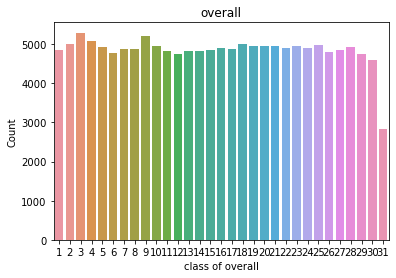

In [29]:
import seaborn as sns 
sns.countplot(x=reviews_df_tr['reviewTime'].dt.day, data=reviews_df)
plt.title("overall")
plt.xlabel("class of overall")
plt.ylabel("Count")
plt.show()

###Determine Importance of "category" Feature

In [30]:
# Category is somehwat important, no big difference -> hot encode
reviews_df_tr.groupby("category").describe()["overall"]

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Alternative Rock,42776.0,4.291752,1.068446,1.0,4.0,5.0,5.0,5.0
Classical,14091.0,4.520758,0.901173,1.0,4.0,5.0,5.0,5.0
Dance & Electronic,9405.0,4.422648,0.952898,1.0,4.0,5.0,5.0,5.0
Jazz,14850.0,4.542626,0.866444,1.0,4.0,5.0,5.0,5.0
Pop,68878.0,4.427800,0.994245,1.0,4.0,5.0,5.0,5.0


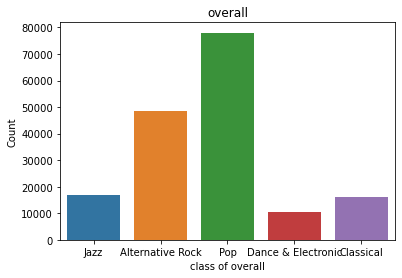

In [31]:
import seaborn as sns 
sns.countplot(x="category", data=reviews_df)
plt.title("overall")
plt.xlabel("class of overall")
plt.ylabel("Count")
plt.show()

###Determine Imporance of "itemID" Review Frequency

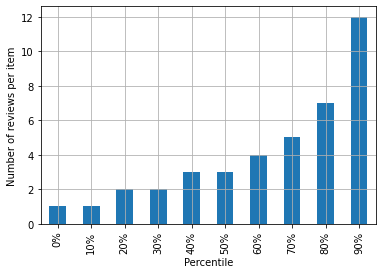

In [32]:
# 40% of the items have at least 4 reviews -> use average review
# if item has less than 4 reviews, use category average for the year 
reviews_df_tr["itemID"].value_counts().describe(percentiles=np.linspace(0, 1,11)).iloc[4:-2].plot(kind="bar")
plt.ylabel("Number of reviews per item")
plt.xlabel("Percentile")
plt.grid()

<AxesSubplot:ylabel='Frequency'>

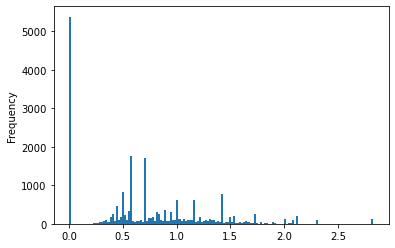

In [33]:
# items have consistent reviews for the most part -> keep
reviews_df_tr.groupby("itemID").std()["overall"].plot(kind="hist", bins=150)

###Determine Importance of "reviewerID" Review Frequency

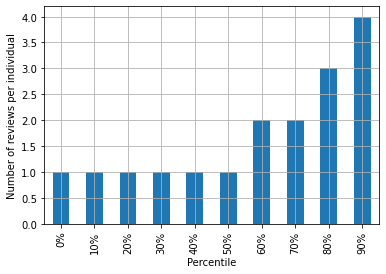

In [34]:
# only 10% of reviewers have at least 4 reviews -> drop
reviews_df_tr["reviewerID"].value_counts().describe(percentiles=np.linspace(0, 1,11)).iloc[4:-2].plot(kind="bar")
plt.ylabel("Number of reviews per individual")
plt.xlabel("Percentile")
plt.grid()

###Determine Importance of "price" Feature

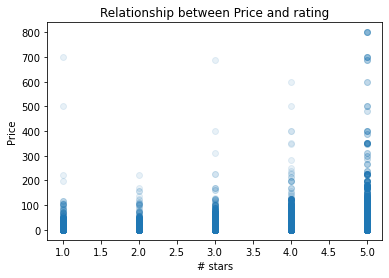

In [35]:
# Price seems to have a relationship with the rating 
plt.scatter(reviews_df_tr["overall"], reviews_df_tr["price"], alpha=.1)
plt.title("Relationship between Price and rating")
plt.ylabel("Price")
plt.xlabel("# stars")
plt.show()

#Feature Engineering

###Create Functions to create Spare Matrix and Export Features

In [46]:
from scipy.sparse import csr_matrix, hstack, save_npz
# Functions to export the data
def to_sparse(features):
  """
  feature is a list of pd.DataFrame
  This function aggrecates all features horizontally and returns one large sparse
  matrix that we use for training the model
  """
  sparse_features = []
  for feature in features:
    if isinstance(feature, csr_matrix):
      sparse_features.append(feature)
    else:
      sparse_features.append(csr_matrix(feature.values))
  return hstack(sparse_features)

def export_features(features, file_name="features"):
  """
  feature is a list of pd.DataFrame
  This function exports features for both training and testing set
  """
  data = to_sparse(features)
  train_data = data.tocsr()[:test_df_start_idx]
  test_data = data.tocsr()[test_df_start_idx:]
  save_npz(file_name + "_train.npz", train_data, compressed=True)
  save_npz(file_name + "_test.npz", test_data, compressed=True)

#Create Functions to get Word Count, Character Count, and Expected Ratings

In [47]:
def count_words(text):
  word_count = len(text.split())
  return word_count

def count_chars(text):
  char_count = len(text) - text.count(' ')
  return char_count

reviews_df["year"] = reviews_df["reviewTime"].dt.year
year_cat_rating = reviews_df.groupby(["year", "category"]).mean()["overall"]
num_review_per_item = reviews_df["itemID"].value_counts()
avg_review_per_item = reviews_df.groupby(["itemID"]).mean()["overall"]

def expected_ratings(row):
    cat_rating = year_cat_rating[row["year"]][row["category"]]
    if row["itemID"] not in num_review_per_item:
        return cat_rating
    if num_review_per_item[row["itemID"]] > 5:
        return avg_review_per_item[row["itemID"]]
    return cat_rating

###Encoding/Obtaining New Features: Year, Category, Expected Ratings, Word Count, Character Count

In [39]:
year_encoding = pd.get_dummies(reviews_df['reviewTime'].dt.year)
category_encoding = pd.get_dummies(reviews_df['category'])
# extra 
expected_rating = reviews_df.apply(expected_ratings, axis=1)
word_count = reviews_df["reviewTextClean"].apply(count_words)
char_count = reviews_df["reviewTextClean"].apply(count_chars)

In [40]:
top_words = get_top_n_words(reviews_df_tr["reviewTextClean"], 4000)
max_features = len(top_words[top_words > 300])
max_features

3798

###Create Bag of Words and Term Frequency-Inverse Document Frequency Feature Datasets

In [41]:
bow = CountVectorizer(max_features=max_features)
bow.fit(reviews_df_tr["reviewTextClean"])

tfidf = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=max_features)
tfidf.fit(reviews_df_tr["reviewTextClean"])

bow_reviews = bow.transform(reviews_df["reviewTextClean"])
tfidf_reviews = tfidf.transform(reviews_df["reviewTextClean"])

In [48]:
base_features = [year_encoding,
                 category_encoding,
                 pd.DataFrame([expected_rating,
                               word_count,
                               char_count,
                               reviews_df["price"]]).T]

export_features(base_features + [bow_reviews], "features_bow")
export_features(base_features + [tfidf_reviews], "features_tfidf")

reviews_df_tr["overall"].to_csv("y.csv")

In [49]:
import scipy.sparse
X = scipy.sparse.load_npz('features_tfidf_train.npz')
y= pd.read_csv('y.csv', header=0)['overall']

In [50]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, stratify=y, random_state=40)

In [51]:
#linear regressor
import timeit
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start = timeit.default_timer()
model.fit(X_train,y_train)
print('linear regression model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
stop = timeit.default_timer()
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
print('Time spent: ', stop - start)  

linear regression model:
training score:  0.4174172815590117
testing score:  0.3544140874263646
training MSE:  0.5790677271952225
validation MSE:  0.6417891545533281
Time spent:  6.178732399999944


In [52]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, n_jobs=8)
start = timeit.default_timer()
model.fit(X_train,y_train)
print('logistic regression model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
stop = timeit.default_timer()
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
print('Time spent: ', stop - start)  

logistic regression model:
training score:  0.7546285714285714
testing score:  0.7255555555555555
training MSE:  0.6656666666666666
validation MSE:  0.7215333333333334
Time spent:  105.85556829999996


In [53]:
#SVM
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=1000)
start = timeit.default_timer()
model.fit(X_train,y_train)
print('SVM model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
stop = timeit.default_timer()
print('Time spent: ', stop - start) 

SVM model:
training score:  0.7029333333333333
testing score:  0.6694666666666667
training MSE:  0.8831904761904762
validation MSE:  1.0383111111111112
Time spent:  159.9382106999999


C:\Users\zyter\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [54]:
#DT
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
start = timeit.default_timer()
model.fit(X_train,y_train)
print('DT model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
stop = timeit.default_timer()
print('Time spent: ', stop - start) 

DT model:
training score:  1.0
testing score:  -0.19234564229514306
training MSE:  0.0
validation MSE:  1.1853333333333333
Time spent:  278.5964978000002


In [55]:
#XGBOOST
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
start = timeit.default_timer()
model.fit(X_train,y_train)
print('DT model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
stop = timeit.default_timer()
print('Time spent: ', stop - start) 

DT model:
training score:  0.7299333333333333
testing score:  0.7178666666666667
training MSE:  0.8832380952380953
validation MSE:  0.9179777777777778
Time spent:  340.28424870000026


In [56]:
#RForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
start = timeit.default_timer()
model.fit(X_train,y_train)
print('random forest model:')
print('training score: ',model.score(X_train,y_train))
print('testing score: ' ,model.score(X_test,y_test))
print('training MSE: ',(np.square(model.predict(X_train) - y_train)).mean(axis = 0))
print('validation MSE: ',(np.square(model.predict(X_test) - y_test)).mean(axis = 0))
stop = timeit.default_timer()
print('Time spent: ', stop - start) 

random forest model:
training score:  0.9998952380952381
testing score:  0.6934666666666667
training MSE:  0.00038095238095238096
validation MSE:  1.178711111111111
Time spent:  335.33626490000006


In [57]:
# using sparse matrix of text and engineered features
classifier_tested = ['logistic regression', 'LinearSVC', 'linear regression','decision tree','XGBoost','random forest'] 
fe_training_mse = [0.665,0.883,0.579,0,0.883,0.0003]
fe_validation_mse = [0.721,1.038,0.641,1.185,0.917,1.178]

fe_result = {'model': classifier_tested, 'training_mse': fe_training_mse, 'validation_mse': fe_validation_mse}

feature_engineered_table = pd.DataFrame(fe_result)
feature_engineered_table

,model,training_mse,validation_mse
0,logistic regression,0.6650,0.721
1,LinearSVC,0.8830,1.038
2,linear regression,0.5790,0.641
3,decision tree,0.0000,1.185
4,XGBoost,0.8830,0.917
5,random forest,0.0003,1.178



# --------------------------------------------------------------------------------------------------------------- Word Embedding strategy

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Setup
#!pip install wordcloud
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import nltk
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import timeit
import re
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#for removing/fixing contractions
!pip install contractions
import contractions

import pandas as pd
from nltk.stem.snowball import SnowballStemmer

from nltk.stem import WordNetLemmatizer 
nltk.download("wordnet")

from sklearn.metrics import accuracy_score, f1_score, make_scorer
import regex
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def rmse(yPred, y):  
    return np.sqrt(mean_squared_error(yPred, y))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
     |████████████████████████████████| 327kB 5.5MB/s 
     |████████████████████████████████| 266kB 7.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85394 sha256=937ba3f9bbf22bc62a0938f3d71761acaa9637f242f1364275615cb6a3e7e31e
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordne

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

old_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train.csv',low_memory = False)
# df_sa = pd.read_csv('sentiment_analysis.csv',low_memory = False)
df = old_df.copy()

Mounted at /content/gdrive


In [ ]:
df.head()

## Data Clean Up

Stopwords are not removed to maintain the dependency information of the words from the sentence.

In [ ]:
#set up the function to clean the text in dataset

def clean_data(df):

  #convert to lowercase
  df['clean_text'] = df['reviewText'].str.lower()
    #fill empty cells with ' '
  df['clean_text'] = df['clean_text'].fillna(' ')
  #contrction
  df['clean_text'] = df['clean_text'].apply(contractions.fix)
  #remove stopwords
  # df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
  #remove @user and URLs
  df['clean_text'] = df['clean_text'].str.replace(r"(?:\@|https?\://)\S+", " ")
  #remove all other special characters
  df['clean_text'] = df['clean_text'].str.replace('[^A-Za-z\s]+', ' ')
  # remove s
  df['clean_text'] = df['clean_text'].str.replace(r'(\ss{1})\b', "") 
  #fill empty cells with ' '
  df['clean_text'] = df['clean_text'].fillna(' ')
  #remove stopwords
  # df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
  

  #for column df['summary']
  #convert to lowercase
  df['clean_summary'] = df['summary'].str.lower()
  #fill empty cells with ' '
  df['clean_summary'] = df['clean_summary'].fillna(' ')
  #contrction
  df['clean_summary'] = df['clean_summary'].apply(contractions.fix)
  #remove stopwords
  # df['clean_summary'] = df['clean_summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
  #remove @user and URLs
  df['clean_summary'] = df['clean_summary'].str.replace(r"(?:\@|https?\://)\S+", " ")
  #remove all other special characters
  df['clean_summary'] = df['clean_summary'].str.replace('[^A-Za-z\s]+', ' ')
  #fill empty cells with ' '
  df['clean_summary'] = df['clean_summary'].str.replace(r'(\ss{1})\b', "") 
  df['clean_summary'] = df['clean_summary'].fillna(' ')
  #remove stopwords
  # df['clean_summary'] = df['clean_summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
  
  #for column df['price']
  df['price'] = df['price'].str.replace('$','')
  df['price'] = pd.to_numeric(df['price'], errors='coerce')
  #fill NaN with mean price
  df['price'] = df['price'].fillna(df['price'].mean())

  return(df)

In [ ]:
start = timeit.default_timer()
clean_data(df)  #this command may take 2 or 3 minutes
stop = timeit.default_timer()
print('Time spent: ', stop - start)  
df.head()

## Word Embedding Model

In [ ]:
import regex
def spacing_token(text):
  text = re.findall(r'\S+', text)
  return text

In [ ]:
df['word_embed_combo'] = df.clean_text.apply(spacing_token) + df.clean_summary.apply(spacing_token) # contain tokenized list
df['sentence_combo'] = df.clean_text + ' ' + df.clean_summary # contains sentence list 

In [ ]:
word_embed_corpus = df['word_embed_combo'].to_list() # corpus with tokenized 
sentence_corpus = df['sentence_combo'].to_list()# corpus with sentence

In [ ]:
import gensim

# saved on gdrive
EMBEDDING_DIM = 100 # dimensionality 
model = gensim.models.Word2Vec(sentences=word_embed_corpus, size=EMBEDDING_DIM, window=5, workers=4, min_count=1)
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 141988


## Use Pickle to Save Model

Pre-train word2vec is saved to .txt file so we do not have to run the model every time

In [ ]:
import pickle
# saving model to gdrive
# pickle.dump(model, open('/content/gdrive/MyDrive/Colab Notebooks/amazon_music_word2vec_model.sav', 'wb'))
# accessing pickle model
amazon_music_word2vec_model = pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/amazon_music_word2vec_model.sav', 'rb')) # word2vec model

In [ ]:
print(amazon_music_word2vec_model)

Word2Vec(vocab=141988, size=100, alpha=0.025)


Word similarity

In [ ]:
amazon_music_word2vec_model.wv.most_similar('good')

[('decent', 0.8013221025466919),
 ('bad', 0.7627097964286804),
 ('great', 0.7574480772018433),
 ('cool', 0.6790109872817993),
 ('nice', 0.6750912666320801),
 ('strong', 0.6520390510559082),
 ('fine', 0.6460371017456055),
 ('solid', 0.6440172791481018),
 ('terrible', 0.6216915249824524),
 ('dracool', 0.6071927547454834)]

Calling .txt file to create embedding layers

In [ ]:
filename = 'amazon_music_embedding_word2vec_no_s.txt'
model.wv.save_word2vec_format(filename, binary = False)

Create embeddings indices

In [ ]:
import os

embeddings_index = {}
f = open(os.path.join('', '/content/gdrive/MyDrive/Colab Notebooks/amazon_music_embedding_word2vec_no_s.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()

In [ ]:
from nltk.tokenize import word_tokenize
count_word = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(df['word_embed_combo'].apply(lambda x: ' '.join(map(str, x))), key = count_word)
length_long_sentence = len(word_tokenize(longest_sentence)) # 5449

Max length of a sentence

In [ ]:
length_long_sentence

5499

Separate features input and target output

In [ ]:
tokenizer_obj.fit_on_texts(word_embed_corpus)
sequences = tokenizer_obj.texts_to_sequences(word_embed_corpus)

word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

review_pad = pad_sequences(sequences, 2000, padding = 'post') # 5499 max length
sentiment =  df['overall'].values
print('Shape of review tensor:', review_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)

Found 141986 unique tokens.
Shape of review tensor: (150000, 2000)
Shape of sentiment tensor: (150000,)


Create weights

In [ ]:
# EMBEDDING_DIM = 100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100)) # 100 dimensions

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

Keras Sequential Neural Nets

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, SimpleRNN
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.layers import Flatten

# define model
model_keras = Sequential()
embedding_layer = Embedding(num_words,
                            100,
                            weights = [embedding_matrix],
                            input_length = 2000, # 5499
                            trainable=False)
model_keras.add(embedding_layer)
model_keras.add(Flatten())
# model_keras.add(SimpleRNN(units=32)) 
model_keras.add(Dense(5, activation='softmax')) # 5 diff classes 

model_keras.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy']) # trying to improve accuracy because MSE didn't work for multiclass

print('Summary of the built model...')
print(model_keras.summary())

Summary of the built model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 2000, 100)         14198700  
_________________________________________________________________
flatten_4 (Flatten)          (None, 200000)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1000005   
Total params: 15,198,705
Trainable params: 1,000,005
Non-trainable params: 14,198,700
_________________________________________________________________
None


Encoding target output. Keras sequential loss = 'categorical_crossentropy' only takes encoded target values

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_both = ohe.fit_transform(df[['overall']]).toarray()
ohe_both_df = pd.DataFrame(ohe_both, columns = [1,2,3,4,5])


In [ ]:
#split the dataset into train and validation
from sklearn.model_selection import train_test_split
X_train_pad, X_test_pad, y_train, y_test = train_test_split(review_pad, ohe_both_df, test_size= 0.2, random_state = 0) # encoded

In [ ]:
zxc_train, zxc_test, y_train_real, y_test_real = train_test_split(review_pad, df[['overall']], test_size= 0.2, random_state = 0) # not encoded

10 Epochs Keras Training

In [ ]:
# model_keras.fit(X_train_pad, y_train, batch_size=128, epochs=1, validation_data=(X_test_pad, y_test), verbose=2)
model_keras.fit(X_train_pad, y_train, epochs = 10, batch_size=128, verbose = 1)

Epoch 1/10
938/938 [==============================] - 120s 128ms/step - loss: 0.8677 - accuracy: 0.7991
Epoch 2/10
938/938 [==============================] - 120s 128ms/step - loss: 0.8727 - accuracy: 0.8006
Epoch 3/10
938/938 [==============================] - 120s 128ms/step - loss: 0.8856 - accuracy: 0.8020
Epoch 4/10
938/938 [==============================] - 120s 128ms/step - loss: 0.8259 - accuracy: 0.8102
Epoch 5/10
938/938 [==============================] - 120s 128ms/step - loss: 0.8153 - accuracy: 0.8096
Epoch 6/10
938/938 [==============================] - 120s 128ms/step - loss: 0.8233 - accuracy: 0.8115
Epoch 7/10
938/938 [==============================] - 120s 128ms/step - loss: 0.7905 - accuracy: 0.8145
Epoch 8/10
938/938 [==============================] - 120s 128ms/step - loss: 0.7885 - accuracy: 0.8186
Epoch 9/10
938/938 [==============================] - 120s 128ms/step - loss: 0.7686 - accuracy: 0.8219
Epoch 10/10
938/938 [==============================] - 120s 128m

Evalute the training accuracy

In [ ]:
loss, accuracy = model_keras.evaluate(X_train_pad, y_train,batch_size=128, verbose=1)

938/938 [==============================] - 36s 38ms/step - loss: 0.6020 - accuracy: 0.8438


Evaluate the validation accuracy (same as making prediction)

In [ ]:
loss, accuracy = model_keras.evaluate(X_test_pad, y_test,batch_size=128, verbose=1) 

235/235 [==============================] - 9s 38ms/step - loss: 7.9715 - accuracy: 0.6067


Fitting the model on training dataset.

accuracy, MSE, and F1_score respectively

In [ ]:
prediction_train = model_keras.predict(X_train_pad)
train_result_proba = pd.DataFrame(prediction_train, columns = [1,2,3,4,5])
train_result_classified = pd.DataFrame(train_result_proba.idxmax(axis=1), columns =['predicted'])
b = pd.concat([train_result_classified, y_train_real.reset_index()[['overall']]], axis = 1)

accuracy_score(b.overall, b.predicted), mean_squared_error(b.overall, b.predicted), f1_score(b.overall, b.predicted, average='macro')

(0.8437833333333333, 0.347475, 0.8068676276720911)

In [ ]:
b

,predicted,overall
0,3,4.0
1,5,5.0
2,5,4.0
3,5,5.0
4,1,1.0
...,...,...
119995,5,5.0
119996,5,4.0
119997,5,5.0
119998,5,5.0


Making prediction on validation dataset using the fitted model from above

In [ ]:
prediction = model_keras.predict(X_test_pad)

In [ ]:
myresult = pd.DataFrame(prediction, columns = [1,2,3,4,5])

In [ ]:
y_test[185:190]

,1,2,3,4,5
80475,0.0,0.0,0.0,0.0,1.0
104180,0.0,0.0,0.0,1.0,0.0
146175,0.0,0.0,0.0,0.0,1.0
57152,0.0,0.0,0.0,0.0,1.0
76184,0.0,0.0,0.0,0.0,1.0


In [ ]:
myresult[185:190]

,1,2,3,4,5
185,1.099350e-07,5.671903e-02,0.004794,9.279249e-01,0.010562
186,3.198452e-28,0.000000e+00,0.000051,9.961578e-01,0.003792
187,1.198098e-16,1.347774e-21,0.000024,5.540529e-08,0.999976
188,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000
189,0.000000e+00,0.000000e+00,0.000000,4.139224e-25,1.000000


In [ ]:
keras_result = pd.DataFrame(myresult.idxmax(axis=1), columns =['predicted'])

In [ ]:
a = pd.concat([keras_result, y_test_real.reset_index()[['overall']]], axis = 1)
a

,predicted,overall
0,5,5.0
1,3,3.0
2,5,5.0
3,5,5.0
4,5,5.0
...,...,...
29995,5,5.0
29996,5,5.0
29997,5,5.0
29998,3,5.0


The MSE is very high. The model is clearly overfitting

In [ ]:
from sklearn.metrics import mean_squared_error
# mean_squared_error(a.overall, a.predicted)
mean_squared_error(a.overall, a.predicted)
# rmse(a.overall, a.predicted)

1.1447

Low accuracy as well

In [ ]:
from sklearn.metrics import f1_score
f1_score(a.overall, a.predicted, average='macro')
from sklearn.metrics import accuracy_score
accuracy_score(a.overall, a.predicted)

0.6182333333333333